In [1]:
!nvidia-smi

Tue Dec 26 09:25:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070        Off | 00000000:01:00.0  On |                  N/A |
| 33%   43C    P8              23W / 220W |    101MiB /  8192MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# preparar algunas funciones para el programa

In [2]:
import zipfile, os

def descomprimir_zip(archivo_zip, directorio_destino):
    try:
        with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
            zip_ref.extractall(directorio_destino)
        print("¡Archivo ZIP descomprimido correctamente!")
    except zipfile.BadZipFile:
        print("Error: El archivo proporcionado no es un archivo ZIP válido.")
    except Exception as e:
        print(f"Error al descomprimir el archivo ZIP: {e}")




#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
Setup complete ✅ (6 CPUs, 31.2 GB RAM, 116.9/467.9 GB disk)


# setear los directorios de trabajo

In [4]:
%cd /content

HOME = os.getcwd()

!mkdir {HOME}/datasets
%cd {HOME}/datasets


print(HOME)

/usr/local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/content
mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
/content


# elegir un dataset para entrenar

## ver los datasets disponibles para entrenar

In [5]:
!ls /datasets

ARRAM-materiales_CVAT.zip  ARRAM_yolo.zip  json_to_yolo.py  orient.zip


## elegir un dataset

In [6]:
NOMBRE_DATASET_USAR = "orient"

## descomprimir el dataset para realizar el entrenamiento

In [7]:


%cp /datasets/{NOMBRE_DATASET_USAR}.zip /content/dataset.zip


class dataset:
    location = "/content"


# Uso del ejemplo:
archivo_zip = '/content/dataset.zip'  # Ruta y nombre del archivo ZIP que quieres descomprimir
directorio_destino = '/content'  # Ruta del directorio donde se extraerán los archivos

descomprimir_zip(archivo_zip, directorio_destino)

¡Archivo ZIP descomprimido correctamente!


# entrenar

In [8]:
BATCH = 5 # ajustar hasta ocupar el maximo de la GPU posible

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True batch={BATCH} save=true

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/data.yaml, epochs=50, patience=50, batch=5, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [13]:
TRAIN_NUMBER="train3"

# opcional

## ver resultados del entrenamiento [opcional]

In [14]:
!ls {HOME}/runs/detect/{TRAIN_NUMBER}/

F1_curve.png					   train_batch2.jpg
PR_curve.png					   train_batch38560.jpg
P_curve.png					   train_batch38561.jpg
R_curve.png					   train_batch38562.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1703582748.b1c0007c9843.946.0  val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/content


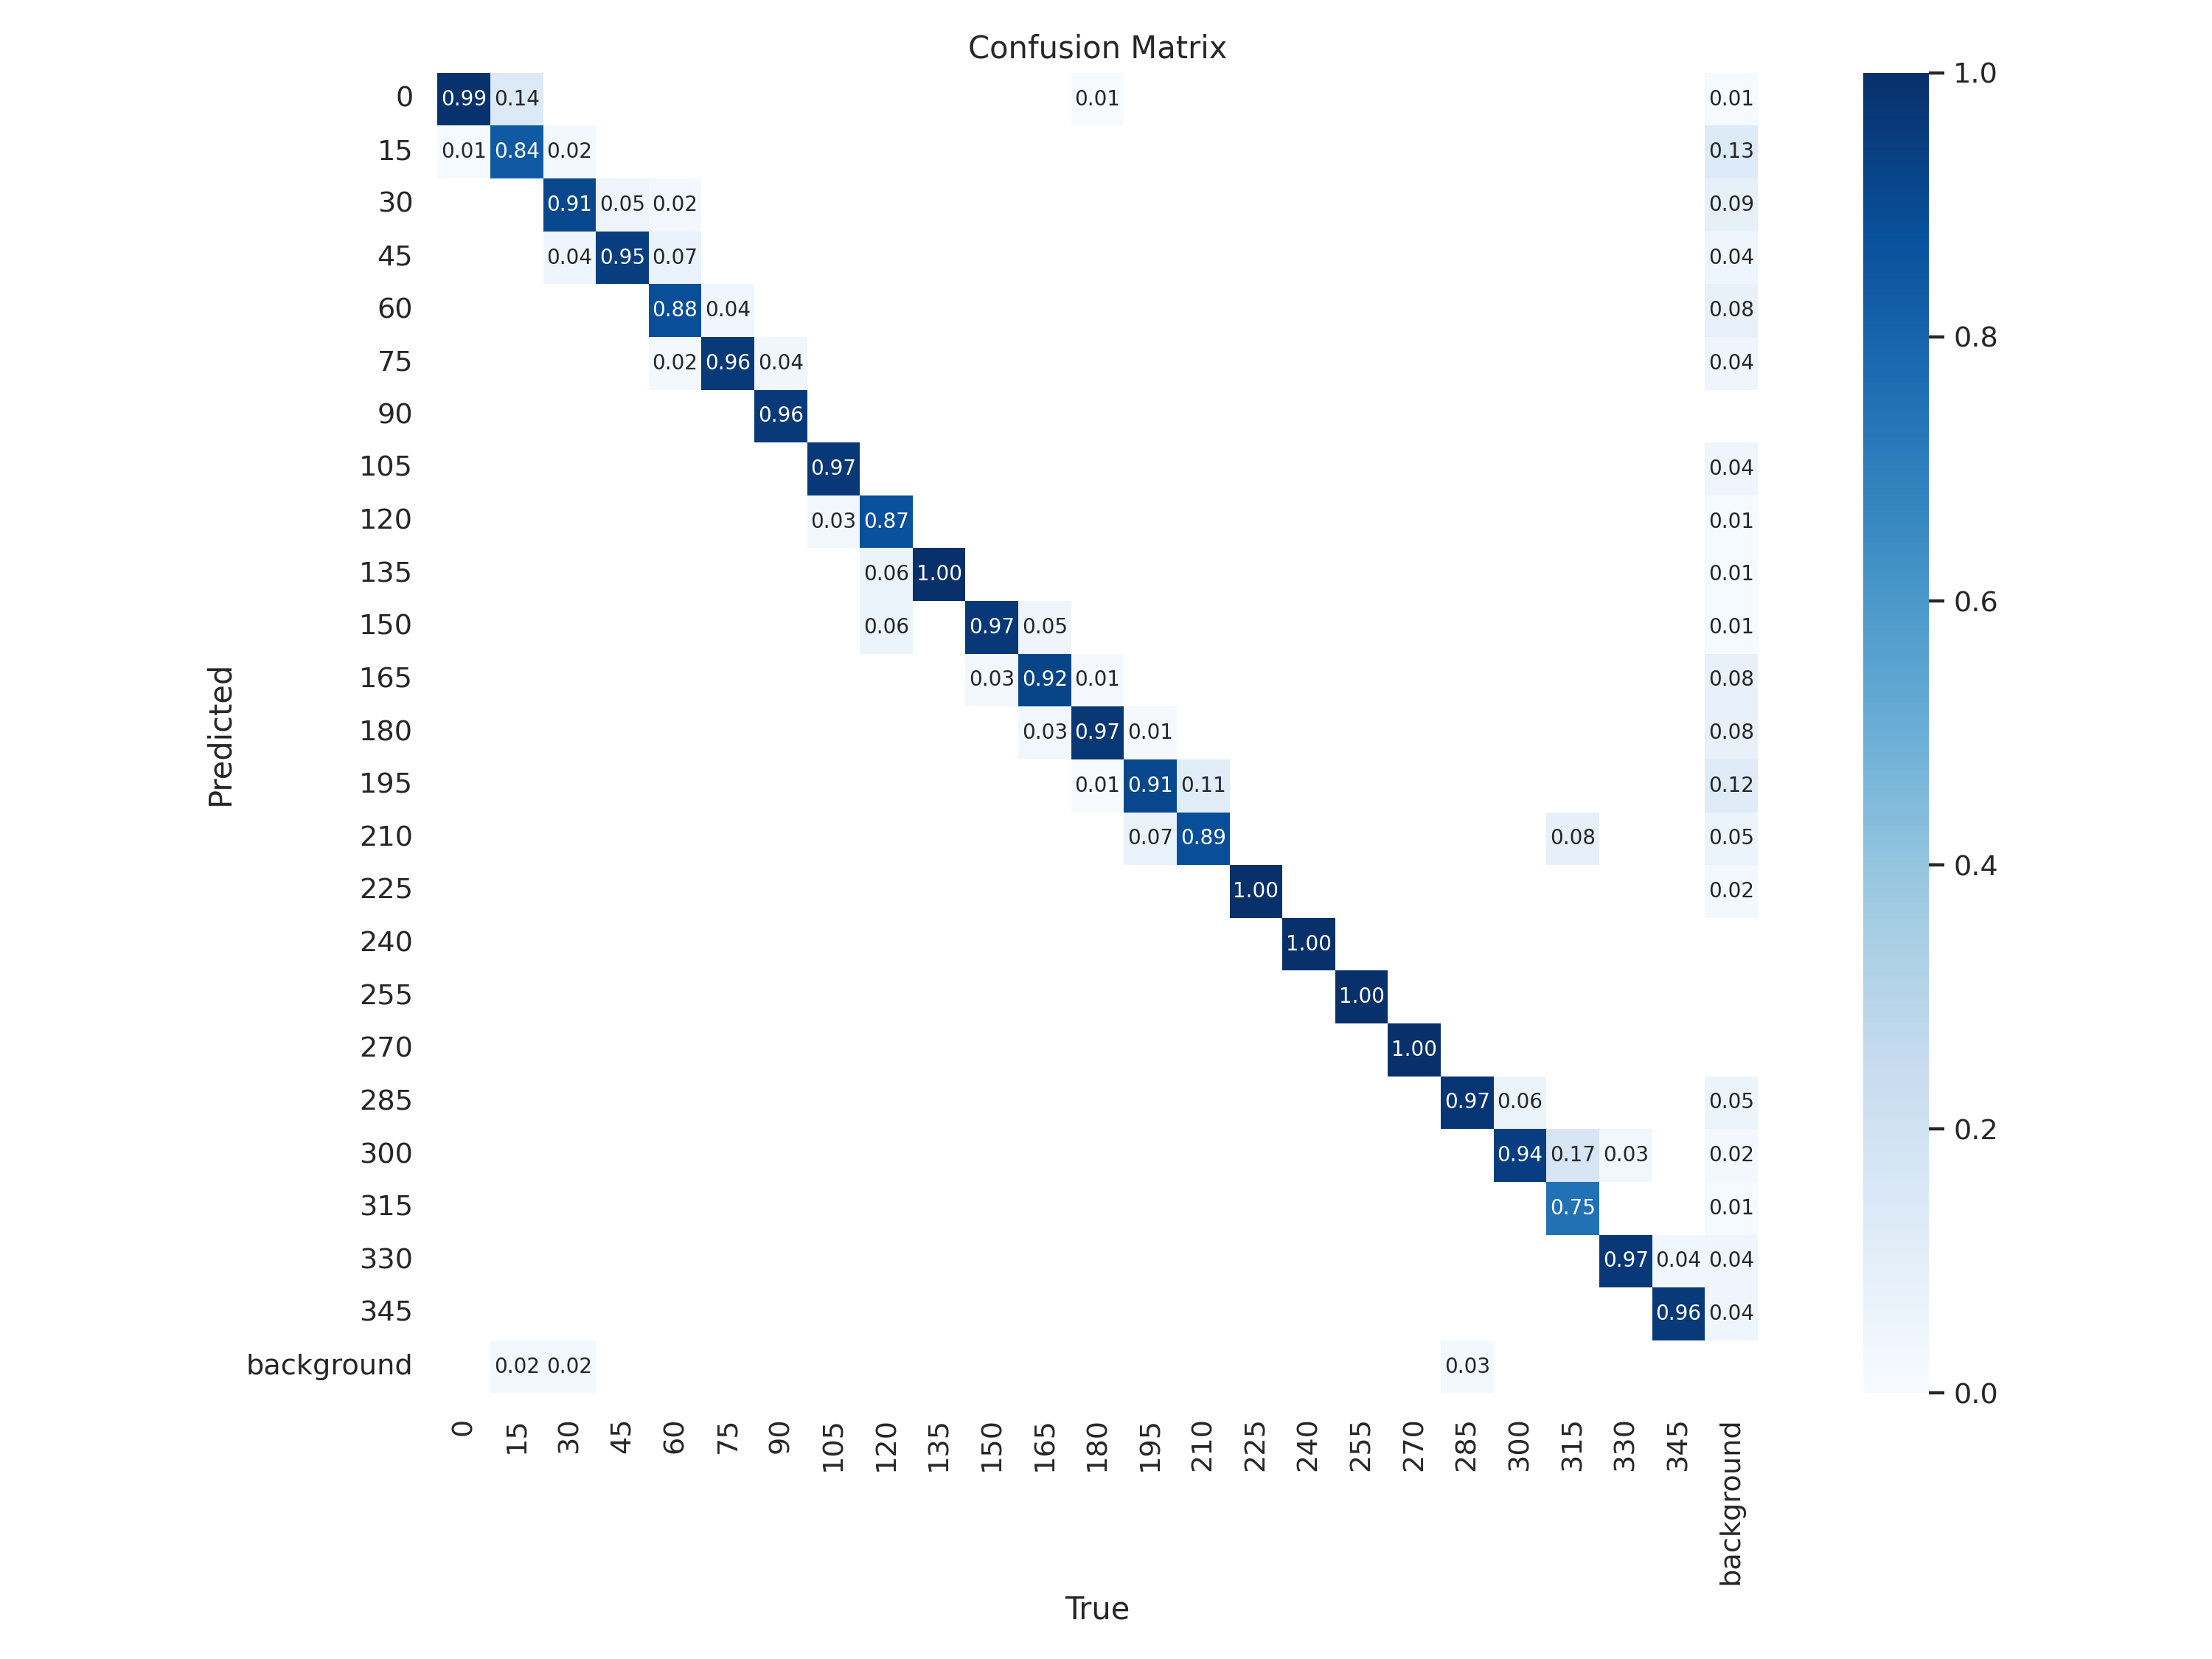

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{TRAIN_NUMBER}/confusion_matrix.png', width=1100)

/content


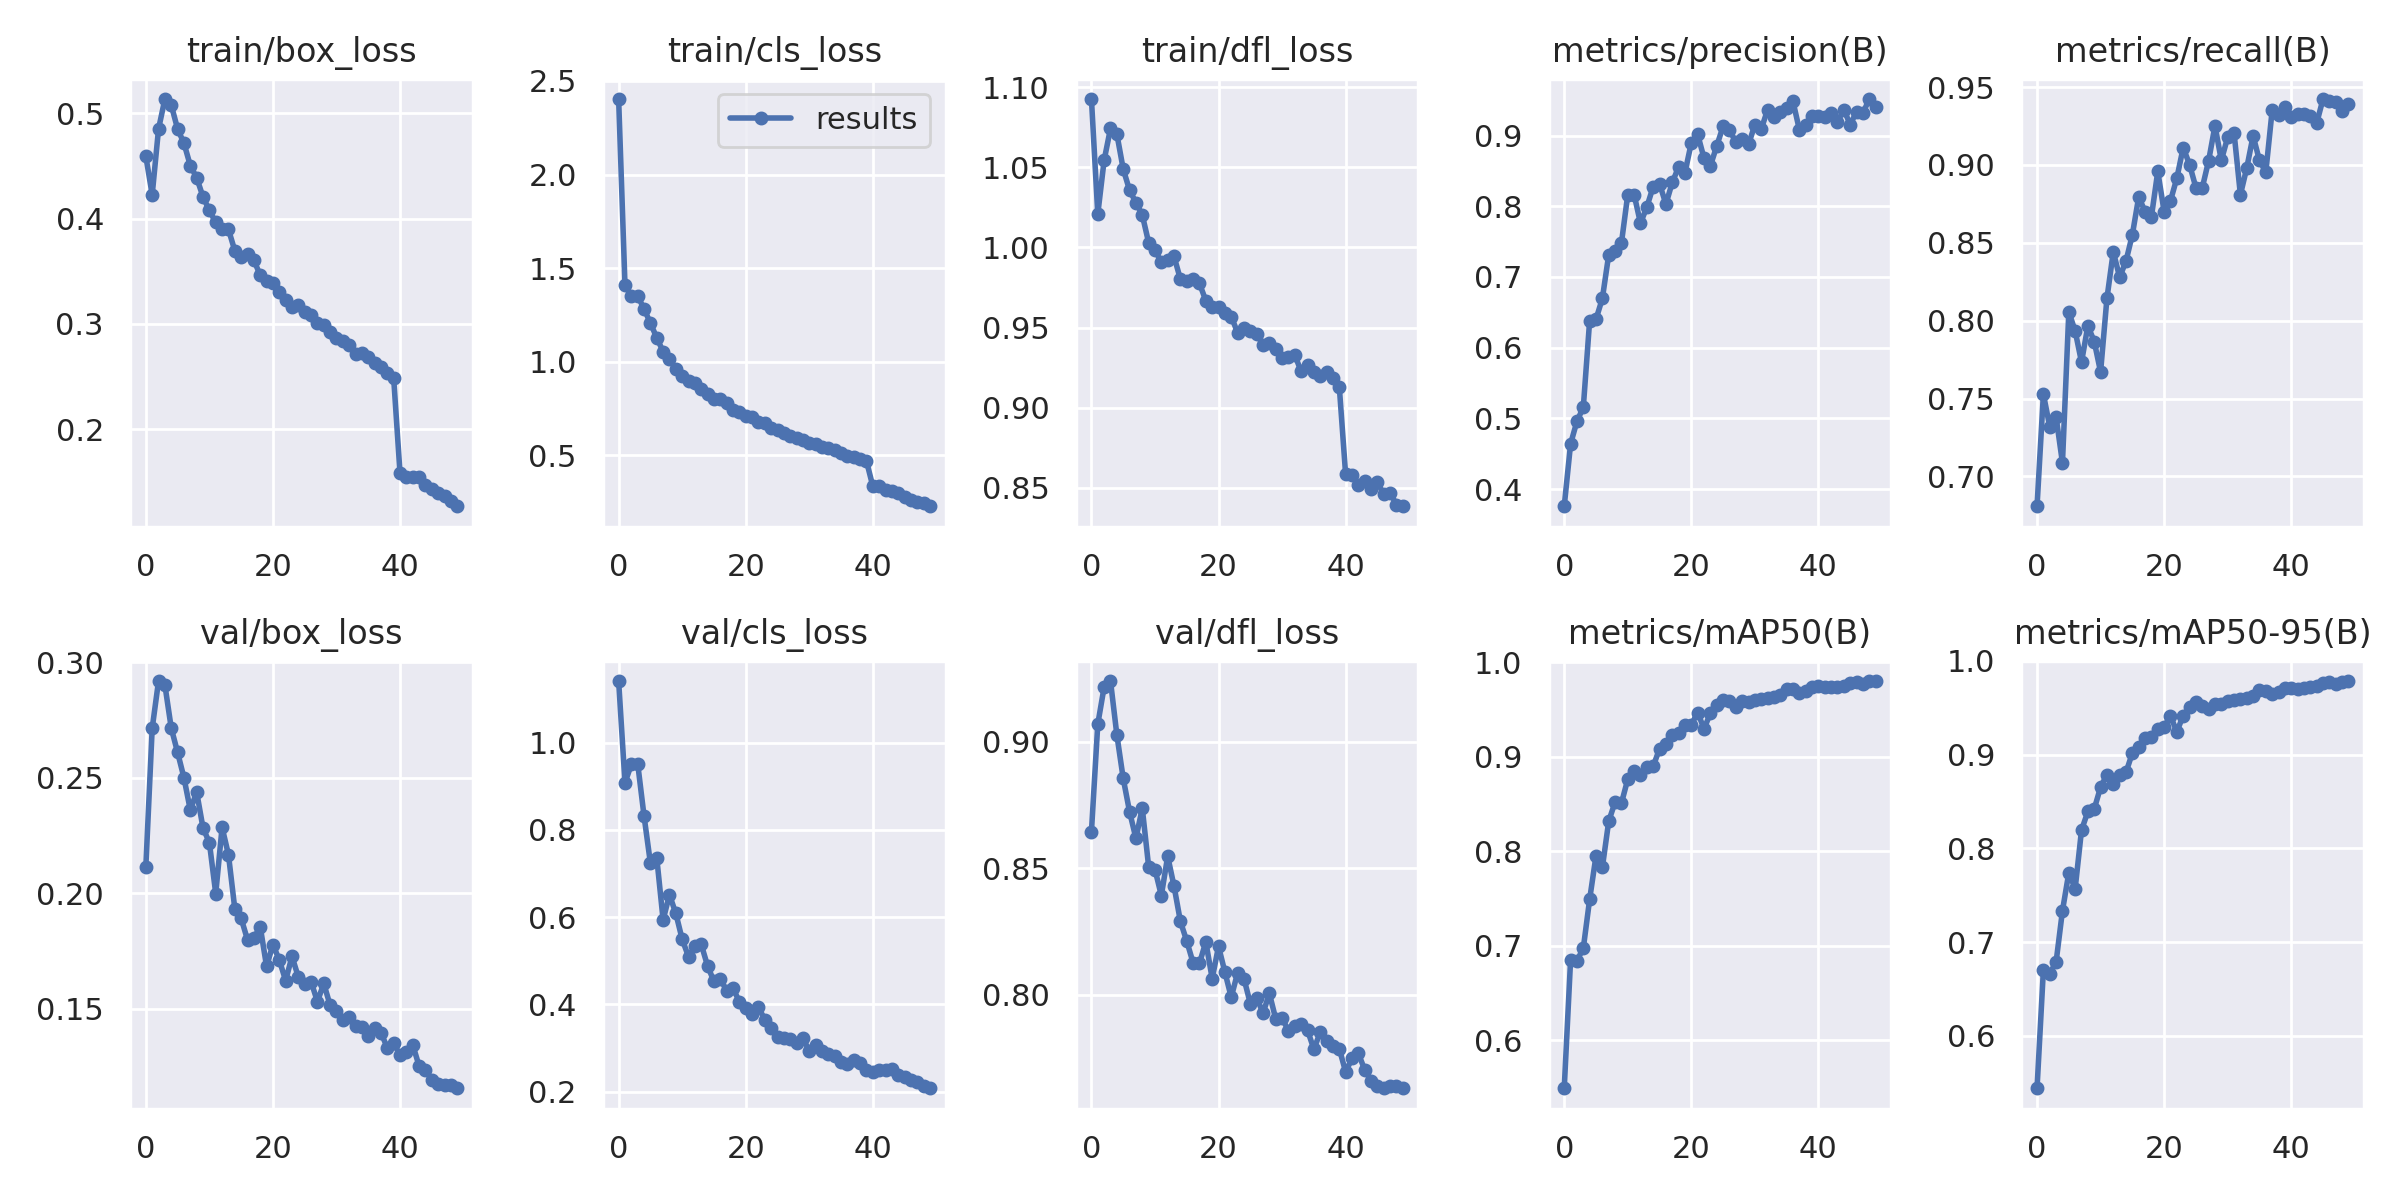

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{TRAIN_NUMBER}/results.png', width=1100)

/content


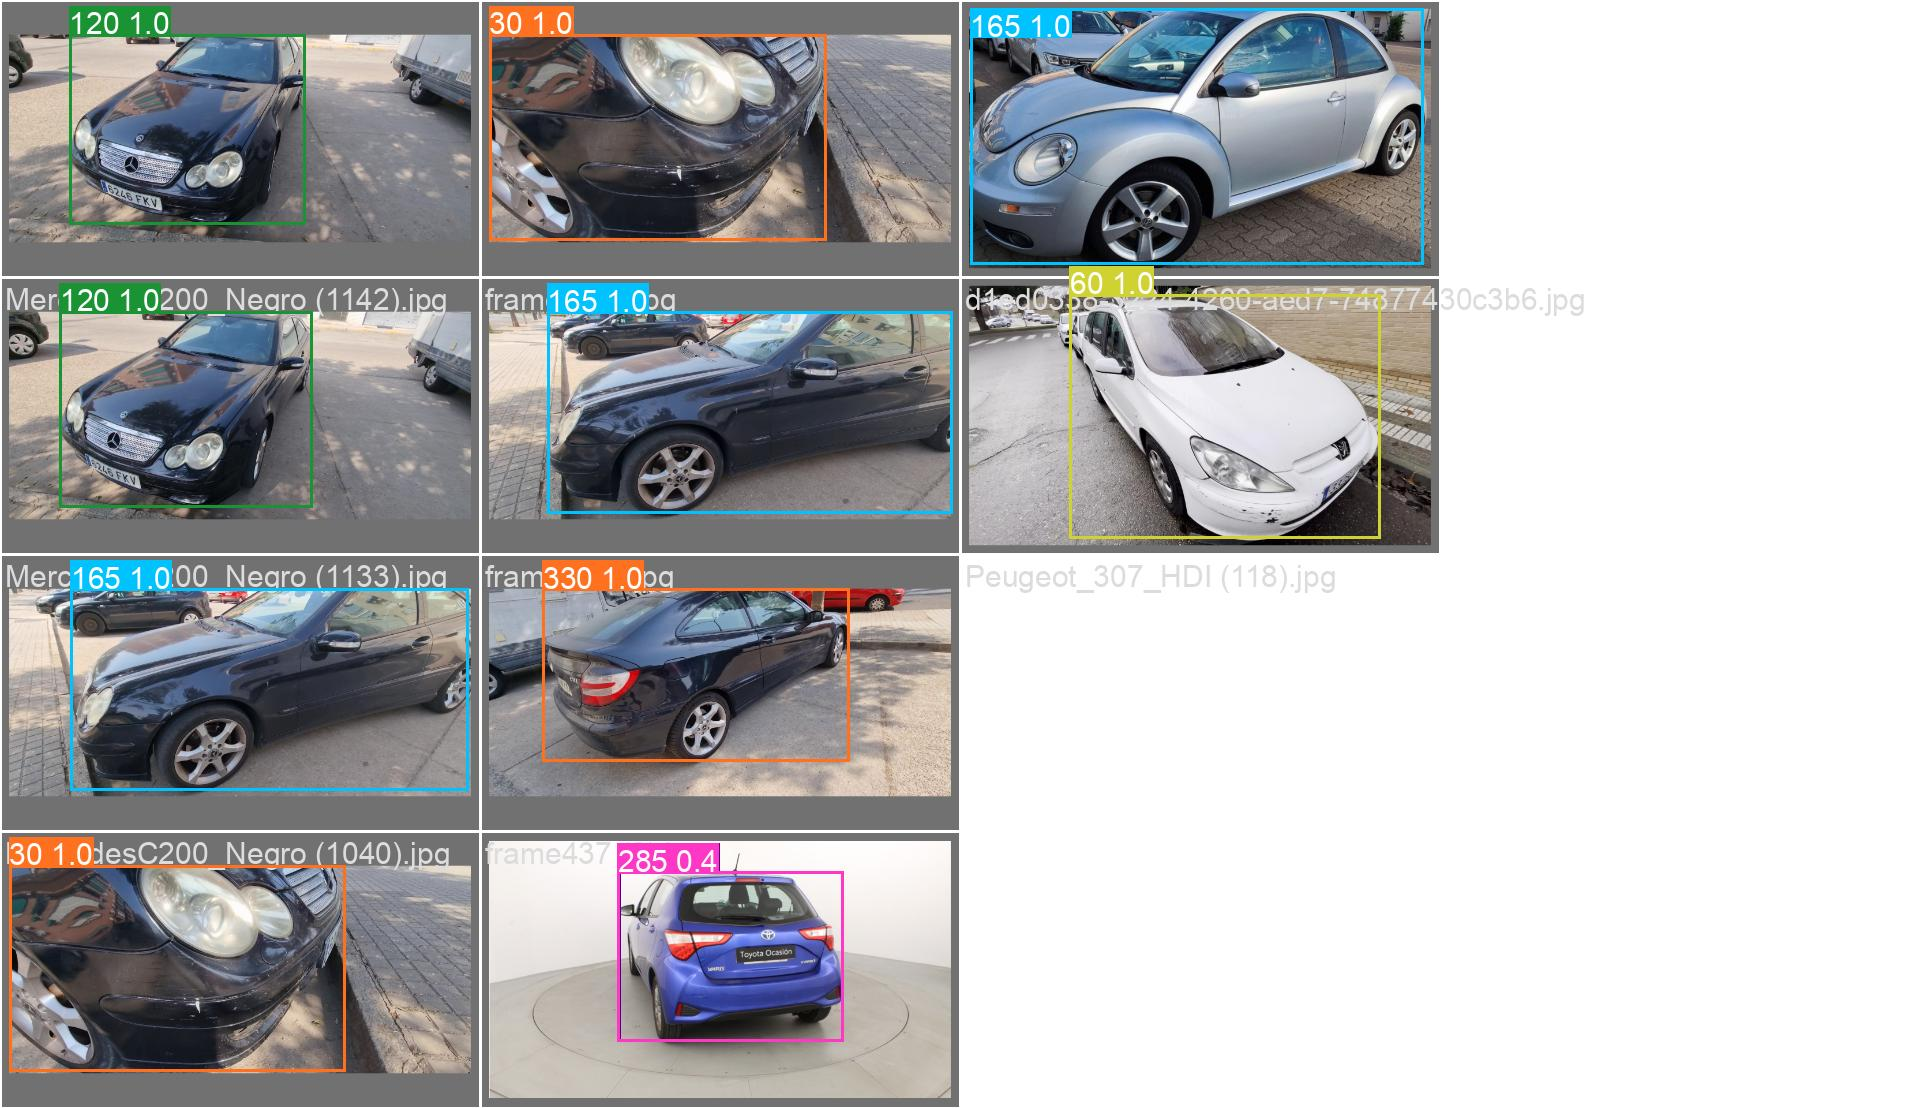

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{TRAIN_NUMBER}/val_batch0_pred.jpg', width=1100)

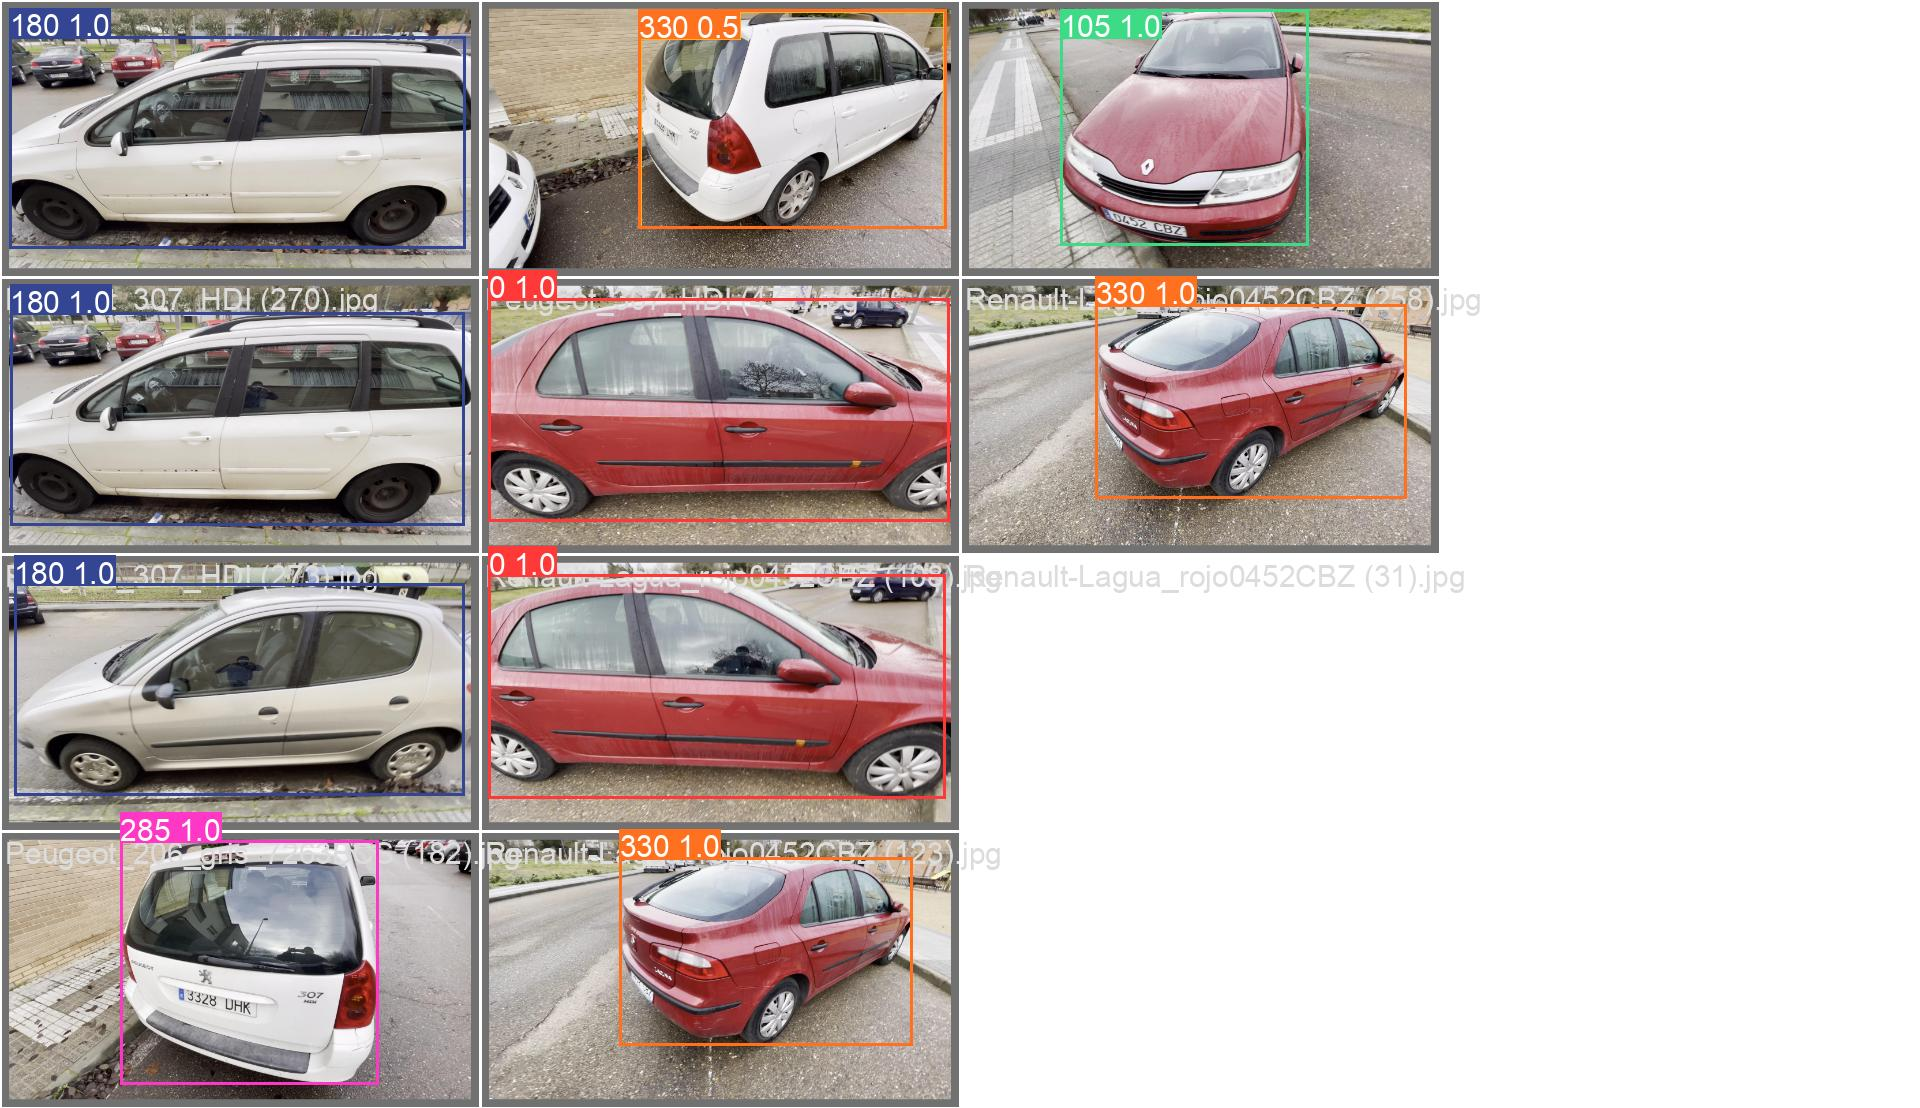

In [18]:
Image(filename=f'{HOME}/runs/detect/{TRAIN_NUMBER}/val_batch2_pred.jpg', width=1100)

## validar el entrenamiento [opcional]

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/{TRAIN_NUMBER}/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
Model summary (fused): 218 layers, 25853656 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/valid/labels.cache... 965 images, 0 backgrounds, 0 corrup
                 Class     Images  Instances      Box(P          R      mAP50  mERROR: Unexpected bus error encountered in worker. This might be caused by insufficient shared memory (shm).
                 Class     Images  Instances      Box(P          R      mAP50  m
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/site-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages

## realizar una prueba del entrenamiento realizado [opcional]

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/{TRAIN_NUMBER}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
Model summary (fused): 218 layers, 25853656 parameters, 0 gradients, 78.8 GFLOPs
image 1/971 /content/test/images/0167f44a-6cb1-43c4-bc7e-070a910a16dd.jpg: 608x800 1 330, 142.1ms
image 2/971 /content/test/images/07f6dd6d-4fec-42a0-84b7-d6cce874144c.jpg: 608x800 1 210, 11.4ms
image 3/971 /content/test/images/0a4a6fef-22cb-4c89-96a8-79baac5d230a.jpg: 608x800 1 165, 11.4ms
image 4/971 /content/test/images/1013_frame228.jpg: 480x800 1 150, 146.4ms
image 5/971 /content/test/images/1025_frame820.jpg: 480x800 1 345, 10.5ms
image 6/971 /content/test/images/1097_frame1316.jpg: 480x800 1 180, 10.4ms
image 7/971 /content/test/images/1139_frame1307.jpg: 480x800 1 180, 10.4ms
image 8/971 /content/test/images/1179_frame1447.jpg: 480x800 1 180, 10.5ms
image 9/971 /content/test/images/1180_frame225.jpg: 480x800 1 105, 10.7ms
image 10/971 /content/test/images/120_frame1565.jpg: 480x800 1 180, 1

# Guardar los resultados [obligatorio]

In [21]:
import shutil
shutil.make_archive('train','zip', f"{HOME}/runs/detect/{TRAIN_NUMBER}/")
%cp /content/train.zip /datasets/{NOMBRE_DATASET_USAR}_train.zip

print("Resultados guardados en:")
print(f"http://192.168.1.35:4443/files/{NOMBRE_DATASET_USAR}_train.zip")

Resultados guardados en:
http://192.168.1.35:4443/files/orient_train.zip
